<a href="https://colab.research.google.com/github/jwang44/Try-colabing-in-colab/blob/main/Credit_card_new_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 551 Mini-project 1
*Group 10: Junhao Wang, Yinan Zhou, and Ruilin Ji*

This notebook is dedicated for the **Credit card dataset**, including the model, cross validation, and various experiments. 

## Start here

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [3]:
import numpy as np
import pandas as pd
import scipy.stats
import statistics

## Credit Card Dataset

In [4]:
# generate new feature by multiplication and normalize
def newfeature(x,y):
  z=x*y
  norz=scipy.stats.zscore(z, axis=0, ddof=0, nan_policy='propagate')
  return norz

In [5]:
# convert csv to dataframe
df = pd.read_csv('creditcard.csv')
original_data = df.to_numpy()

In [6]:
# normalize feature
NorData = scipy.stats.zscore(df.iloc[:,:-1], axis=0, ddof=0, nan_policy='propagate') # no class column
# normalized dataset
NorDataset = np.column_stack((NorData,df.iloc[:,-1]))

New feature

In [7]:
NewF1 = newfeature(df.V3, df.V7)
NewF2 = newfeature(df.V11, df.V12)
NewF3 = newfeature(df.V12, df.V16)
NewF4 = newfeature(df.V16, df.V17)
NewF5 = newfeature(df.V16, df.V18)
NewF6 = newfeature(df.V17, df.V18)
NewF7 = df.iloc[:,0]              # initialize new feature 7 using 1st feature
NewF8 = newfeature(df.V3, df.V12)       # multiply features of most importance
n_row,n_col = np.shape(NorData)
NewFSq = np.zeros(n_row)            # initialize new features using 0s
for col in range(n_col):
  # new feature 7: multiplying all features
  if col>0:
    NewF7 = newfeature(NewF7,df.iloc[:,col])
  # new feature 8-: square all columns
  new = newfeature(df.iloc[:,col],df.iloc[:,col]) # square feature
  NewFSq = np.column_stack((NewFSq,new))

NewFSq = np.delete(NewFSq,0,1)
# new feature
NewF = np.column_stack((NewF1,NewF2,NewF3,NewF4,NewF5,NewF6,NewF7,NewF8))
# NewF = np.column_stack((NewF1,NewF2,NewF3,NewF4,NewF5,NewF6))

In [8]:
# normalized dataset with new feature
NorDatasetNew = np.column_stack((NorData,NewF,df.iloc[:,-1]))

## The model

In [9]:
 # sigmoid function
def sigmoid(a):
  return 1/(1+np.exp(-a))


class Logistic_regression():
  def __init__(self):#,X_train,y_train,learning_rate,X_test,y_test):
    pass
    
  # train
  def fit(self, X_train, y_train, learning_rate):
    # X_train: training features, y_train: training labels
    n, m = np.shape(X_train)  # n samples, m features
    y_train = y_train.reshape(-1, 1)
    w = np.ones([m+1, 1]) # features + 1
    dummy_feature = np.ones([n, 1])
    X = np.concatenate((X_train, dummy_feature), axis=1) # n samples, m+1 features
    # max iteration allowed
    max_iter = 5000 
    for i in range(max_iter):
      y_predict = sigmoid(np.matmul(X, w))  # n * 1
      grad = -np.matmul(X.T, (y_train - y_predict))  # m+1 * 1
      w = w - learning_rate * grad
      if np.linalg.norm(learning_rate * grad) < 0.001:
        print("Early stop at iteration: ", i+1)
        break
    return w
  
  # validation
  def predict(self,w,X_test):
    #n,m = np.shape(self.X_test)
    n,m = np.shape(X_test)   
    y_predict = np.zeros([n,1])
    for i in range(0,n):
      #xi = self.X_test[i].T
      xi = X_test[i].T
      x0 = np.array([1])
      xi = np.concatenate((xi, x0),axis = 0)
      p1 = sigmoid(np.matmul(w.T,xi)) # calculate probabilities p(y=1|x)
      # covert probabilities to 0 or 1 by thresholding at 0.5
      if p1>=0.5:
        y_predict[i] = 1
      else:
        y_predict[i] = 0
    return y_predict

  # evaluate accuracy
  def Accu_eval(self,y_test,y_predict):
    #y_predict = self.predict(X_test)
    n,j = np.shape(y_predict)
    TP = 0;FP = 0;TN = 0;FN = 0
    # count TP,TN,FP,FN in validation set
    '''for i in range(n):
      if  self.y_test[i]==1 and y_predict[i]==1:
        TP = TP+1
      elif self.y_test[i]==0 and y_predict[i]==0:
        TN = TN+1
      elif self.y_test[i]==0 and y_predict[i]==1:
        FP = FP+1
      elif self.y_test[i]==1 and y_predict[i]==0:
        FN = FN+1'''
    for i in range(n):
      if  y_test[i]==1 and y_predict[i]==1:
        TP = TP+1
      elif y_test[i]==0 and y_predict[i]==0:
        TN = TN+1
      elif y_test[i]==0 and y_predict[i]==1:
        FP = FP+1
      elif y_test[i]==1 and y_predict[i]==0:
        FN = FN+1    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F = 2*precision*recall/(precision+recall)
    specificity = TN/(FP+TN)
    FPR = FP/(FP+TN)
    print("accuracy:",accuracy)
    # print("precision:",precision)
    # print("recall:",recall)
    # print("F:",F)
    # print("specificity:",specificity)
    # print("False Positive Rate:",FPR)
    # print("")
    return accuracy
    

In [10]:
# figure out which feature is of the most importance
model = Logistic_regression()
np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels
w = model.fit(X,y,learning_rate=0.001)
print(w)

Early stop at iteration:  2408
[[ 1.55081845]
 [ 1.0933058 ]
 [-4.03375893]
 [ 1.94595797]
 [ 1.26066542]
 [-1.71833441]
 [-0.70288352]
 [-2.77580802]
 [-0.22065837]
 [-2.45386379]
 [ 0.14203829]
 [-4.5782209 ]
 [-0.14985273]
 [-1.1939046 ]
 [-0.61306626]
 [-0.16584005]
 [ 1.27379042]
 [ 1.29107767]
 [-0.01049958]
 [-1.0596618 ]
 [-0.4266146 ]
 [ 1.70847384]
 [ 0.45035064]
 [-0.41407882]
 [-0.48774679]
 [ 0.1353532 ]
 [-0.91413545]
 [ 0.12909789]
 [ 1.2530027 ]
 [ 4.96807387]]


## Cross validation

In [11]:
class Cross_validation():
  def __init__(self, k):
    # k: k-fold
    self.k = k

  def prepare_data(self, data):
    # data: np array converted from csv
    np.random.shuffle(data)
    X = data[:, :-1]  # features
    y = data[:, -1]   # labels

    # split data into k equal segments, assign them to train and test later
    Xs = np.array_split(X, self.k, axis=0)
    ys = np.array_split(y, self.k, axis=0)
    return Xs, ys

  def get_accuracy(self, Xs, ys, lr):
    accu_trains = []
    accu_tests = []
    for i in range(self.k):
      X_cv = Xs[:] # X_cross_validation
      y_cv = ys[:] # y_cross_validation

      X_test = X_cv.pop(i)
      y_test = y_cv.pop(i)

      X_train = np.concatenate(X_cv)
      y_train = np.concatenate(y_cv)

      model = Logistic_regression()
      w = model.fit(X_train, y_train, lr)

      print("----------FOLD ", i+1, "----------")

      print("----Train----")
      y_predict_train = model.predict(w, X_train)
      accu_train = model.Accu_eval(y_train, y_predict_train)
      accu_trains.append(accu_train)

      print("----Validation----")
      y_predict_test = model.predict(w, X_test)
      accu_test = model.Accu_eval(y_test, y_predict_test)
      accu_tests.append(accu_test)

    return np.mean(accu_trains), np.mean(accu_tests)


## Experiment with different learning rates

In [12]:
lrs = np.logspace(-5, -1, 10) # different learning rates to try
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(original_data)
for lr in lrs:
  print("---------------LEARNING RATE: ", lr, "---------------")
  accu_train_avg, accu_val_avg = cv.get_accuracy(Xs, ys, lr)
  print("---------------TRAIN AVERAGE ACCURACY", accu_train_avg, "---------------")
  print("---------------VALIDATION AVERAGE ACCURACY", accu_val_avg, "---------------")
  print("\n-------------------------------------------------------------------------------\n")


---------------LEARNING RATE:  1e-05 ---------------
----------FOLD  1 ----------
----Train----
accuracy: 0.9349046015712682
----Validation----
accuracy: 0.89


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


----------FOLD  2 ----------
----Train----
accuracy: 0.8262331838565022
----Validation----
accuracy: 0.8787878787878788
----------FOLD  3 ----------
----Train----
accuracy: 0.8778026905829597
----Validation----
accuracy: 0.8787878787878788
----------FOLD  4 ----------
----Train----
accuracy: 0.844170403587444
----Validation----
accuracy: 0.8585858585858586
----------FOLD  5 ----------
----Train----
accuracy: 0.9282511210762332
----Validation----
accuracy: 0.9292929292929293
----------FOLD  6 ----------
----Train----
accuracy: 0.8340807174887892
----Validation----
accuracy: 0.8181818181818182
----------FOLD  7 ----------
----Train----
accuracy: 0.8789237668161435
----Validation----
accuracy: 0.8484848484848485
----------FOLD  8 ----------
----Train----
accuracy: 0.929372197309417
----Validation----
accuracy: 0.9393939393939394
----------FOLD  9 ----------
----Train----
accuracy: 0.9304932735426009
----Validation----
accuracy: 0.9191919191919192
----------FOLD  10 ----------
----Train---

In [ ]:
lrs = np.logspace(-5, -1, 10) # different learning rates to try
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDataset)
for lr in lrs:
  print("---------------LEARNING RATE: ", lr, "---------------")
  accu_train_avg, accu_val_avg = cv.get_accuracy(Xs, ys, lr)
  print("---------------TRAIN AVERAGE ACCURACY", accu_train_avg, "---------------")
  print("---------------VALIDATION AVERAGE ACCURACY", accu_val_avg, "---------------")
  print("\n-------------------------------------------------------------------------------\n")


---------------LEARNING RATE:  1e-05 ---------------
Early stop at iteration:  1526
----------FOLD  1 ----------
----Train----
accuracy: 0.8877665544332211
----Validation----
accuracy: 0.85
Early stop at iteration:  1513
----------FOLD  2 ----------
----Train----
accuracy: 0.8890134529147982
----Validation----
accuracy: 0.898989898989899
Early stop at iteration:  1481
----------FOLD  3 ----------
----Train----
accuracy: 0.8890134529147982
----Validation----
accuracy: 0.8282828282828283
Early stop at iteration:  1589
----------FOLD  4 ----------
----Train----
accuracy: 0.8946188340807175
----Validation----
accuracy: 0.9191919191919192
Early stop at iteration:  1536
----------FOLD  5 ----------
----Train----
accuracy: 0.8968609865470852
----Validation----
accuracy: 0.8585858585858586
Early stop at iteration:  1482
----------FOLD  6 ----------
----Train----
accuracy: 0.8923766816143498
----Validation----
accuracy: 0.8080808080808081
Early stop at iteration:  1535
----------FOLD  7 -------

In [13]:
lrs = np.logspace(-5, -1, 10) # different learning rates to try
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDatasetNew)
for lr in lrs:
  print("---------------LEARNING RATE: ", lr, "---------------")
  accu_train_avg, accu_val_avg = cv.get_accuracy(Xs, ys, lr)
  print("---------------TRAIN AVERAGE ACCURACY", accu_train_avg, "---------------")
  print("---------------VALIDATION AVERAGE ACCURACY", accu_val_avg, "---------------")
  print("\n-------------------------------------------------------------------------------\n")

---------------LEARNING RATE:  1e-05 ---------------
Early stop at iteration:  1706
----------FOLD  1 ----------
----Train----
accuracy: 0.8821548821548821
----Validation----
accuracy: 0.92
Early stop at iteration:  1724
----------FOLD  2 ----------
----Train----
accuracy: 0.8856502242152466
----Validation----
accuracy: 0.9090909090909091
Early stop at iteration:  1622
----------FOLD  3 ----------
----Train----
accuracy: 0.8901345291479821
----Validation----
accuracy: 0.797979797979798
Early stop at iteration:  1738
----------FOLD  4 ----------
----Train----
accuracy: 0.8923766816143498
----Validation----
accuracy: 0.9292929292929293
Early stop at iteration:  1690
----------FOLD  5 ----------
----Train----
accuracy: 0.8834080717488789
----Validation----
accuracy: 0.9090909090909091
Early stop at iteration:  1641
----------FOLD  6 ----------
----Train----
accuracy: 0.8834080717488789
----Validation----
accuracy: 0.8383838383838383
Early stop at iteration:  1655
----------FOLD  7 -------

## Experiment with different features

During the experiment on different learning rates, we found that the best learning rates for the three sets of features: 

* Original dataset: **0.0359**

* Normalized dataset: **0.0006**

* Normalized dataset with new features: **0.0006 or 0.0017**

For displaying the model accuracies more clearly, in this section
we train a model on each dataset using its best learning rate. 

In [14]:
lr = 0.0359
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(original_data)
print("----------Using orginal data, no normalization, no new features----------")
accu_avg_train, accu_avg_val = cv.get_accuracy(Xs, ys, lr)
print("----------AVERAGE ACCURACY: train-",accu_avg_train," vs. validation-",accu_avg_val, "----------")
print("\n---------------------------------------------------------------------")


----------Using orginal data, no normalization, no new features----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


----------FOLD  1 ----------
----Train----
accuracy: 0.9259259259259259
----Validation----
accuracy: 0.92
----------FOLD  2 ----------
----Train----
accuracy: 0.8408071748878924
----Validation----
accuracy: 0.8181818181818182
----------FOLD  3 ----------
----Train----
accuracy: 0.8721973094170403
----Validation----
accuracy: 0.8686868686868687
----------FOLD  4 ----------
----Train----
accuracy: 0.8654708520179372
----Validation----
accuracy: 0.8787878787878788
----------FOLD  5 ----------
----Train----
accuracy: 0.8452914798206278
----Validation----
accuracy: 0.8383838383838383
----------FOLD  6 ----------
----Train----
accuracy: 0.9271300448430493
----Validation----
accuracy: 0.9393939393939394
----------FOLD  7 ----------
----Train----
accuracy: 0.8621076233183856
----Validation----
accuracy: 0.8383838383838383
----------FOLD  8 ----------
----Train----
accuracy: 0.9260089686098655
----Validation----
accuracy: 0.9494949494949495
----------FOLD  9 ----------
----Train----
accuracy: 0

In [15]:
lr = 0.0006
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDataset)
print("----------Using normalized features, without new features----------")
accu_avg_train, accu_avg_val = cv.get_accuracy(Xs, ys, lr)
print("----------AVERAGE ACCURACY: train-",accu_avg_train," vs. validation-",accu_avg_val, "----------")
print("\n---------------------------------------------------------------------")


----------Using normalized features, without new features----------
Early stop at iteration:  2593
----------FOLD  1 ----------
----Train----
accuracy: 0.9652076318742986
----Validation----
accuracy: 0.97
Early stop at iteration:  2721
----------FOLD  2 ----------
----Train----
accuracy: 0.9641255605381166
----Validation----
accuracy: 0.9595959595959596
Early stop at iteration:  2591
----------FOLD  3 ----------
----Train----
accuracy: 0.9663677130044843
----Validation----
accuracy: 0.9494949494949495
Early stop at iteration:  2741
----------FOLD  4 ----------
----Train----
accuracy: 0.9663677130044843
----Validation----
accuracy: 0.9393939393939394
Early stop at iteration:  2478
----------FOLD  5 ----------
----Train----
accuracy: 0.9630044843049327
----Validation----
accuracy: 0.98989898989899
Early stop at iteration:  2518
----------FOLD  6 ----------
----Train----
accuracy: 0.9674887892376681
----Validation----
accuracy: 0.9595959595959596
Early stop at iteration:  2932
----------F

In [17]:
lr = 0.0017
cv = Cross_validation(10) # 10-fold cross-validation
Xs, ys = cv.prepare_data(NorDatasetNew)
print("----------Using normalized features, with new features----------")
accu_avg_train, accu_avg_val = cv.get_accuracy(Xs, ys, lr)
print("----------AVERAGE ACCURACY: train-",accu_avg_train," vs. validation-",accu_avg_val, "----------")
print("\n---------------------------------------------------------------------")


----------Using normalized features, with new features----------
Early stop at iteration:  2344
----------FOLD  1 ----------
----Train----
accuracy: 0.9674523007856342
----Validation----
accuracy: 0.96
Early stop at iteration:  4116
----------FOLD  2 ----------
----Train----
accuracy: 0.9719730941704036
----Validation----
accuracy: 0.9191919191919192
Early stop at iteration:  2444
----------FOLD  3 ----------
----Train----
accuracy: 0.9663677130044843
----Validation----
accuracy: 0.9797979797979798
Early stop at iteration:  2524
----------FOLD  4 ----------
----Train----
accuracy: 0.9641255605381166
----Validation----
accuracy: 0.9595959595959596
Early stop at iteration:  2509
----------FOLD  5 ----------
----Train----
accuracy: 0.9641255605381166
----Validation----
accuracy: 0.9696969696969697
Early stop at iteration:  2517
----------FOLD  6 ----------
----Train----
accuracy: 0.9708520179372198
----Validation----
accuracy: 0.9292929292929293
Early stop at iteration:  2401
----------FO

## Measure the run time
See whether the model converges faster on normalized data than on original data. This is measured by training the model and time it. This part stands on its own, and is not related to any of the above process

###Comparison on original and normalized dataset

####Using the original dataset

In [18]:
model = Logistic_regression()
np.random.shuffle(original_data)
X = original_data[:, :-1]  # features
y = original_data[:, -1]   # labels

In [19]:
%%timeit
w = model.fit(X, y, learning_rate=0.00001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


1 loop, best of 3: 426 ms per loop


In [20]:
%%timeit
w = model.fit(X, y, learning_rate=0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


1 loop, best of 3: 490 ms per loop


In [21]:
%%timeit
w = model.fit(X, y, learning_rate=0.01)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


1 loop, best of 3: 497 ms per loop


####Using normalized dataset

In [22]:
model = Logistic_regression()
np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels

In [23]:
%%timeit
w = model.fit(X, y, learning_rate=0.00001)

Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early stop at iteration:  1568
Early st

In [24]:
%%timeit
w = model.fit(X, y, learning_rate=0.001)

Early stop at iteration:  2408
Early stop at iteration:  2408
Early stop at iteration:  2408
Early stop at iteration:  2408
1 loop, best of 3: 211 ms per loop


In [25]:
%%timeit
w = model.fit(X, y, learning_rate=0.01)

Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early stop at iteration:  2110
Early st

### Scanning more lrs

learning rate:  0.0001
Early stop at iteration:  2012
time:  0.18056988716125488
learning rate:  0.0001438449888287663
Early stop at iteration:  2245
time:  0.20694851875305176
learning rate:  0.00020691380811147902
Early stop at iteration:  2466
time:  0.23728537559509277
learning rate:  0.00029763514416313193
Early stop at iteration:  2631
time:  0.23705768585205078
learning rate:  0.00042813323987193956
Early stop at iteration:  2655
time:  0.24550604820251465
learning rate:  0.0006158482110660267
Early stop at iteration:  2568
time:  0.23929977416992188
learning rate:  0.0008858667904100823
Early stop at iteration:  2450
time:  0.22341465950012207
learning rate:  0.0012742749857031334
Early stop at iteration:  2320
time:  0.24155640602111816
learning rate:  0.0018329807108324356
Early stop at iteration:  2180
time:  0.21182847023010254
learning rate:  0.0026366508987303583
Early stop at iteration:  2041
time:  0.1935577392578125
learning rate:  0.00379269019073225
Early stop at ite

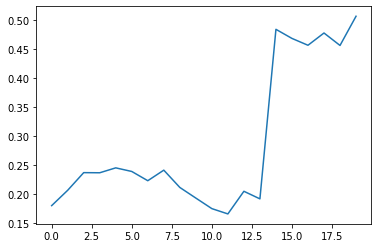

In [26]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.shuffle(NorDataset)
X = NorDataset[:, :-1]  # features
y = NorDataset[:, -1]   # labels

lrs = np.logspace(-4, -1, 20) # different learning rates to try
times = []

for lr in lrs:
  model = Logistic_regression()
  print("learning rate: ", lr)
  t1 = time.time()
  w = model.fit(X, y, learning_rate=lr)
  t2 = time.time()
  print("time: ", t2-t1)
  times.append(t2-t1)

plt.plot(times)